In [1]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [3]:
image_size = 256
batch_size = 32
channels = 3
epochs = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle=True,
                                                   image_size = (image_size,image_size),
                                                   batch_size = batch_size)

Found 2152 files belonging to 3 classes.


In [5]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

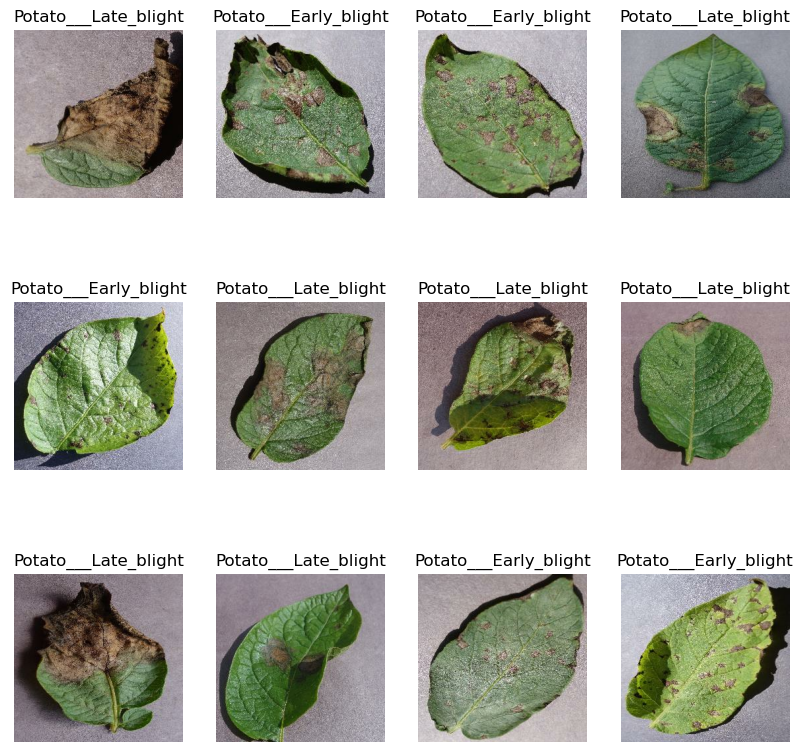

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
80% ==> training
20% ==> 10% validation, 10% test 

SyntaxError: invalid syntax (2427660459.py, line 1)

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    val_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(0.1/255)
    
    
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [23]:
model.compile(
     optimizer='adam',
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
     metrics=['accuracy']  
)


In [24]:
history = model.fit(
     train_ds,
    batch_size=batch_size,
    validation_data = val_ds,
    verbose=1,
    epochs = 10
   
)

Epoch 1/10
54/54 [==============================] - 167s 3s/step - loss: 0.9246 - accuracy: 0.4682 - val_loss: 0.9152 - val_accuracy: 0.4336
Epoch 2/10
54/54 [==============================] - 160s 3s/step - loss: 0.7870 - accuracy: 0.6644 - val_loss: 0.5942 - val_accuracy: 0.7422
Epoch 3/10
54/54 [==============================] - 140s 3s/step - loss: 0.4800 - accuracy: 0.8275 - val_loss: 0.4514 - val_accuracy: 0.8477
Epoch 4/10
54/54 [==============================] - 136s 3s/step - loss: 0.4532 - accuracy: 0.8368 - val_loss: 0.4244 - val_accuracy: 0.8516
Epoch 5/10
54/54 [==============================] - 144s 3s/step - loss: 0.3844 - accuracy: 0.8547 - val_loss: 0.4010 - val_accuracy: 0.8516
Epoch 6/10
54/54 [==============================] - 166s 3s/step - loss: 0.3274 - accuracy: 0.8756 - val_loss: 0.3288 - val_accuracy: 0.8906
Epoch 7/10
54/54 [==============================] - 168s 3s/step - loss: 0.2582 - accuracy: 0.9022 - val_loss: 0.2819 - val_accuracy: 0.9062
Epoch 8/10
54

In [25]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 17s 336ms/step - loss: 0.1672 - accuracy: 0.9353


In [26]:
history

In [27]:
history.params


{'verbose': 1, 'epochs': 10, 'steps': 54}

In [28]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
type(history.history['loss'])


list

In [30]:
len(history.history['loss'])

10

In [31]:
history.history['loss'][:5] # show loss for first 5 epochs


[0.924645185470581,
 0.787021279335022,
 0.48003870248794556,
 0.453168123960495,
 0.3844292461872101]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

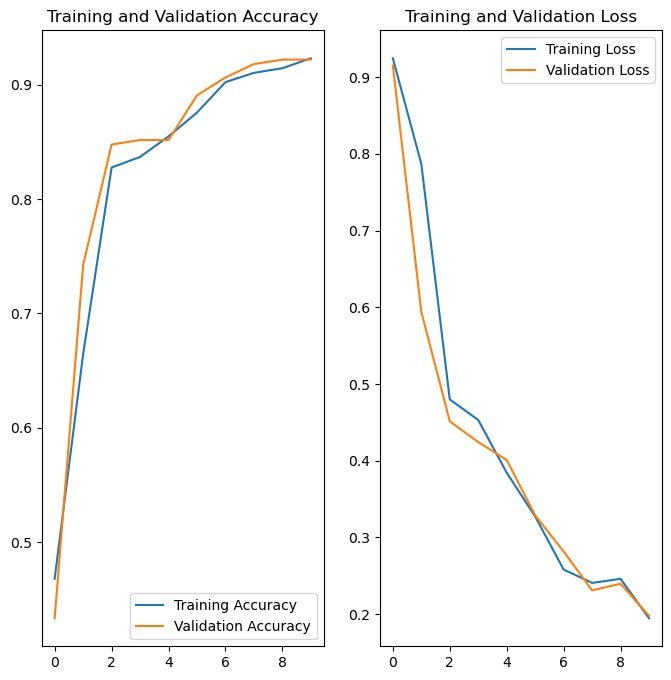

In [33]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 374ms/step
predicted label: Potato___Late_blight


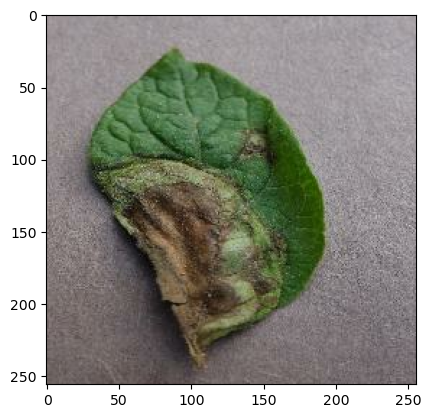

In [51]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])

In [42]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


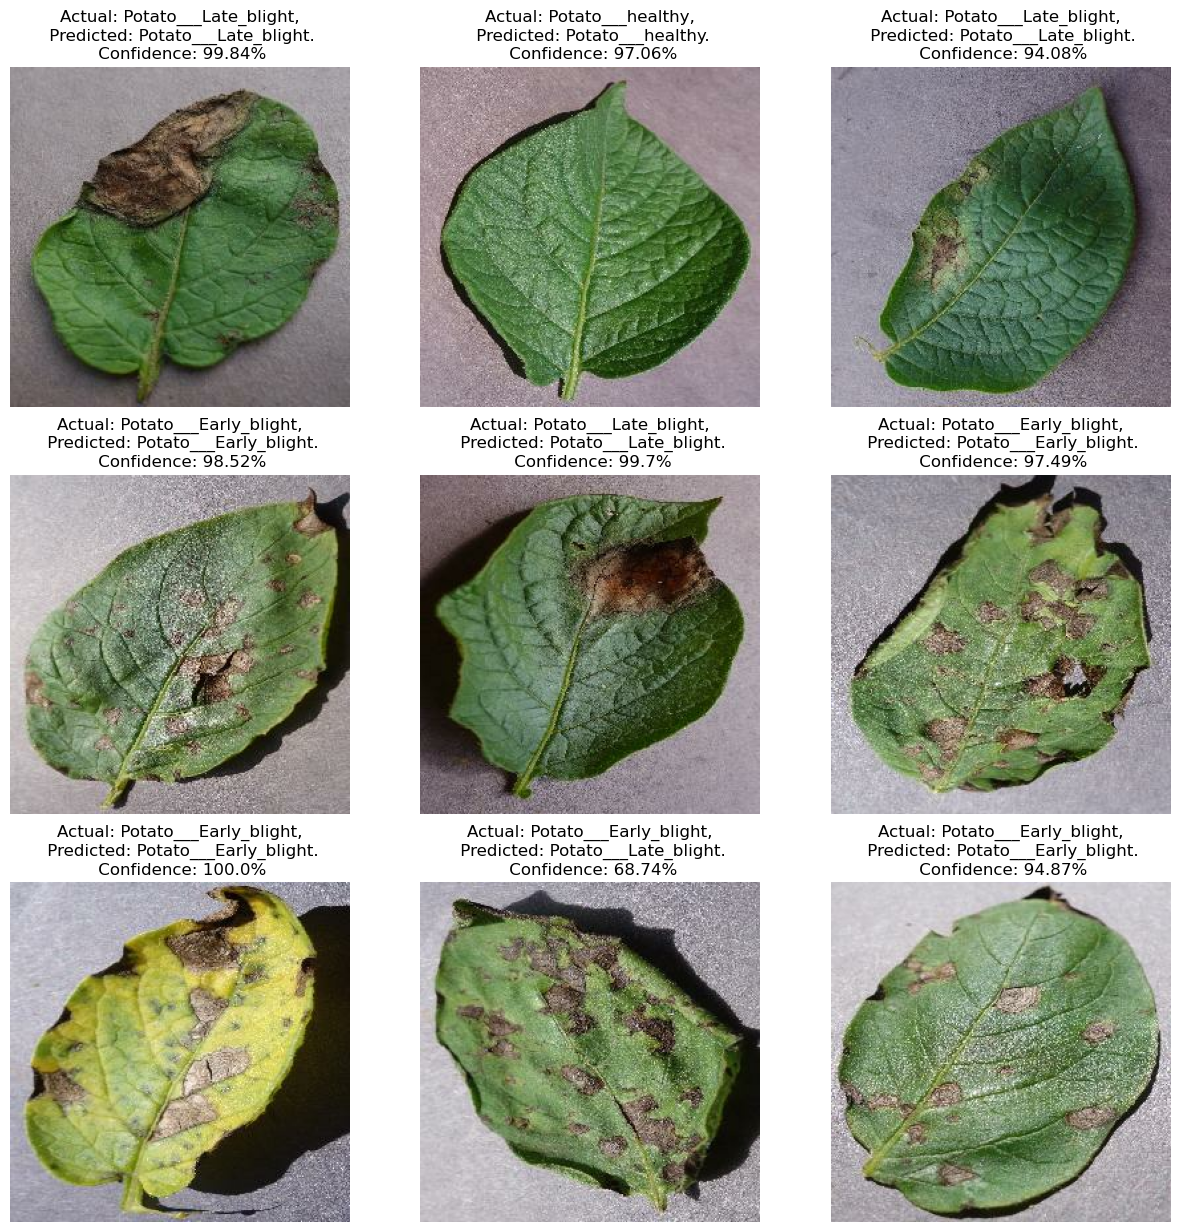

In [44]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## saving the model 

In [48]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [49]:
import os

# Define the directory where you want to save the model
save_dir = "../models"

# Ensure the directory exists; create it if it doesn't
os.makedirs(save_dir, exist_ok=True)

# List the existing model versions in the directory and find the next version
existing_model_versions = [int(i) for i in os.listdir(save_dir) if i.isdigit()]
model_version = max(existing_model_versions + [0]) + 1

# Save the model to the specified location with the correct model version
try:
    model.save(os.path.join(save_dir, str(model_version)))
    print(f"Model saved to: {os.path.join(save_dir, str(model_version))}")
except Exception as e:
    print(f"Error saving the model: {e}")


INFO:tensorflow:Assets written to: ../models\1\assets


INFO:tensorflow:Assets written to: ../models\1\assets


Model saved to: ../models\1


In [50]:
model.save("../potatoes.h5")

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
